In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
path_mg_BasicMartin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/BasicMartin.csv"
path_mg_HLMartin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/HLMartin.csv"
path_mg_Atlas_12 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/AtlasSecondLevel.csv"

In [3]:
mg_BasicMartin = pd.read_csv(path_mg_BasicMartin)
mg_HLMartin = pd.read_csv(path_mg_HLMartin)
mg_Atlas = pd.read_csv(path_mg_Atlas_12)

In [68]:
rows = ['All markers','Hepa markers','Chol markers','LSEC markers','Portal vein markers','Central vein markers','Stel markers','Fibr markers','Meso markers','Kupf markers','B cell markers','Portal LAM markers','Oth im markers']
columns = ['In all lists','In Basic and HL Martin, not in Atlas','In Basic Martin and Atlas, not in HL Martin','In HL Martin and Atlas, not in Basic Martin','Only in Basic Martin','Only in HL Martin','Only in Atlas']
cell_types = ['Hepa','Chol','LSEC','Portal vein','Central vein','Stel','Fibr','Meso','Kupf','B cell','Portal LAM','Oth im']
# make dataframe
df = pd.DataFrame(index=rows,columns=columns)
df = df.fillna(0)
i = 1
for ct in cell_types:
    set_basic = set(mg_BasicMartin.iloc[:,0][set(mg_BasicMartin[mg_BasicMartin[ct]>0].index)])
    set_HL = set(mg_HLMartin.iloc[:,0][set(mg_HLMartin[mg_HLMartin[ct]>0].index)])
    set_Atlas = set(mg_Atlas.iloc[:,0][set(mg_Atlas[mg_Atlas[ct]>0].index)])
    set_all_lists = set_basic.intersection(set_HL).intersection(set_Atlas)
    set_basic_HL = set_basic.intersection(set_HL).difference(set_Atlas)
    set_basic_Atlas = set_basic.intersection(set_Atlas).difference(set_HL)
    set_HL_Atlas = set_HL.intersection(set_Atlas).difference(set_basic)
    set_only_basic = set_basic.difference(set_HL).difference(set_Atlas)
    set_only_HL = set_HL.difference(set_basic).difference(set_Atlas)
    set_only_Atlas = set_Atlas.difference(set_basic).difference(set_HL)
    df['In all lists'][i] = len(set_all_lists)
    df['In Basic and HL Martin, not in Atlas'][i] = len(set_basic_HL)
    df['In Basic Martin and Atlas, not in HL Martin'][i] = len(set_basic_Atlas)
    df['In HL Martin and Atlas, not in Basic Martin'][i] = len(set_HL_Atlas)
    df['Only in Basic Martin'][i] = len(set_only_basic)
    df['Only in HL Martin'][i] = len(set_only_HL)
    df['Only in Atlas'][i] = len(set_only_Atlas)
    i += 1
for c in df.columns:
    df[c][0] = df[c][1:].sum()
# switch columns and rows
df_transposed = df.transpose()
df_transposed

,All markers,Hepa markers,Chol markers,LSEC markers,Portal vein markers,Central vein markers,Stel markers,Fibr markers,Meso markers,Kupf markers,B cell markers,Portal LAM markers,Oth im markers
In all lists,88,4,7,7,4,6,10,13,5,16,4,6,6
"In Basic and HL Martin, not in Atlas",11,0,0,0,1,1,0,3,0,0,0,6,0
"In Basic Martin and Atlas, not in HL Martin",9,4,0,1,0,0,4,0,0,0,0,0,0
"In HL Martin and Atlas, not in Basic Martin",16,1,1,2,0,1,2,5,0,2,1,1,0
Only in Basic Martin,7,2,0,3,0,0,2,0,0,0,0,0,0
Only in HL Martin,21,1,0,1,2,2,3,3,2,5,0,2,0
Only in Atlas,12,0,1,0,1,0,0,0,3,2,0,5,0


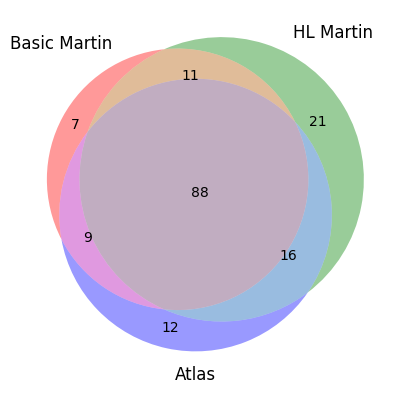

In [69]:
from matplotlib_venn import venn3
markers = 'All markers'
venn3(subsets = (df['Only in Basic Martin'][markers],df['Only in HL Martin'][markers],df['In Basic and HL Martin, not in Atlas'][markers],df['Only in Atlas'][markers],df['In Basic Martin and Atlas, not in HL Martin'][markers],df['In HL Martin and Atlas, not in Basic Martin'][markers],df['In all lists'][markers]),set_labels=('Basic Martin', 'HL Martin', 'Atlas'))
plt.show()

In [70]:
df2 = pd.DataFrame(index=['Basic Martin','HL Martin','Atlas'],columns=rows)
df2 = df2.fillna(0)
df2
for r in rows:
    df2[r]['Basic Martin'] = df['In all lists'][r] + df['In Basic and HL Martin, not in Atlas'][r] + df['In Basic Martin and Atlas, not in HL Martin'][r] + df['Only in Basic Martin'][r]
    df2[r]['HL Martin'] = df['In all lists'][r] + df['In Basic and HL Martin, not in Atlas'][r] + df['In HL Martin and Atlas, not in Basic Martin'][r] + df['Only in HL Martin'][r]
    df2[r]['Atlas'] = df['In all lists'][r] + df['In Basic Martin and Atlas, not in HL Martin'][r] + df['In HL Martin and Atlas, not in Basic Martin'][r] + df['Only in Atlas'][r]
df2    

,All markers,Hepa markers,Chol markers,LSEC markers,Portal vein markers,Central vein markers,Stel markers,Fibr markers,Meso markers,Kupf markers,B cell markers,Portal LAM markers,Oth im markers
Basic Martin,115,10,7,11,5,7,16,16,5,16,4,12,6
HL Martin,136,6,8,10,7,10,15,24,7,23,5,15,6
Atlas,125,9,9,10,5,7,16,18,8,20,5,12,6
